Crear el DataSet







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


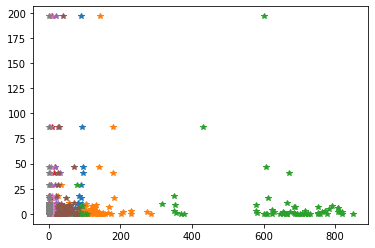

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO: Change to drive path or upload to session
dataset = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/forestfires.csv')

# Used variables
in_var = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']
out_var = ['area']

# Divide data randomly - 70% / 15% / 15%
training_data, validation_data, test_data = np.split(
      dataset.sample(frac=1, random_state=42),
      [int(0.7 * len(dataset)), int(0.85 * len(dataset))]
    )

x_training = training_data[in_var].to_numpy()
y_training = training_data[out_var].to_numpy()

x_validation = validation_data[in_var].to_numpy()
y_validation = validation_data[out_var].to_numpy()

x_test = test_data[in_var].to_numpy()
y_test = test_data[out_var].to_numpy()

plt.plot(x_test, y_test, '*')

# Modelo 



In [4]:
def h(x_i,w):
  return np.dot(x_i, w.transpose())

# Loss function 


In [5]:
def Error_MSE(x,y,w):
  return sum([(y[i]-h(x[i], w))**2/(2.0*len(x)) for i in range(len(x))])

In [47]:
def Error_MAE(x,y,w):
  return sum([np.abs((y[i]-h(x[i], w)))/(2.0*len(x)) for i in range(len(x))])

# Cálculo de derivadas
 

In [37]:
def derivadas_MSE(x,y,w):
  derivadas = []
  for j in range(len(w)):
    dw_j = sum([((y[i] - h(x[i],w))*(-1*(x[i][j]**j)))/(len(x)) for i in range(len(x))])
    derivadas.append(dw_j)
  return derivadas

In [38]:
def derivadas_MAE(x,y,w):
  derivadas = []
  for j in range(len(w)):
    dw_j = sum([((-1*(x[i][j]**j)))/(len(x)) for i in range(len(x))])
    derivadas.append(dw_j)
  return derivadas

# Actualización de parámetros 


In [9]:
def update(w,alpha,dw):
  for j in range(len(w)):
    w[j] = w[j] - alpha*dw[j]
  return w

# Training

In [44]:
def train(x, y, alfa, grado, epoch):
  w = np.array([np.random.rand() for i in range(grado+1)])
  LE = []
  LV = []
  for i in range(epoch):
    dw = derivadas_MAE(x,y,w)
    w = update(w,alfa,dw)
    Le = Error_MAE(x_training,y_training,w)
    LE.append(Le)
    Lv = Error_MAE(x_validation,y_validation,w)
    LV.append(Lv)
  return LE,LV,w

def Plot_Loss(loss_e,loss_v,epoch):
   #plt.plot(epochs, loss_e,loss_v)
   plt.plot(loss_e, "purple")
   plt.plot(loss_v, "orange")
   plt.legend(["Training", "Testing"])



# Testing

In [45]:
def test(x,y,w):
  e = Error_MAE(x,y,w)
  print(e)

def test_validation(x, y, w):
  e = Error_MAE(x,y,w)
  print(e)

In [ ]:
epoch = 1000

grader = 7

for i in [0.00000000000000001,0.000000000000000001,0.0000000000000000001,0.00000000000000000001]:
  err_training, err_validacion, w = train(x_training, y_training, i, grader, epoch)
  print("Error promedio para alpha de valor: " + str(i))
  test_validation(x_validation, y_validation, w)
  print("Error promedio para alpha de valor: " + str(i))
  test(x_test, y_test, w)